**Miminizing objective Funtion with Momentum implementation**

Using the toy dataset. Make sure to place the LRdata.txt in the same folder as this .ipynb file for the code to work.

[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


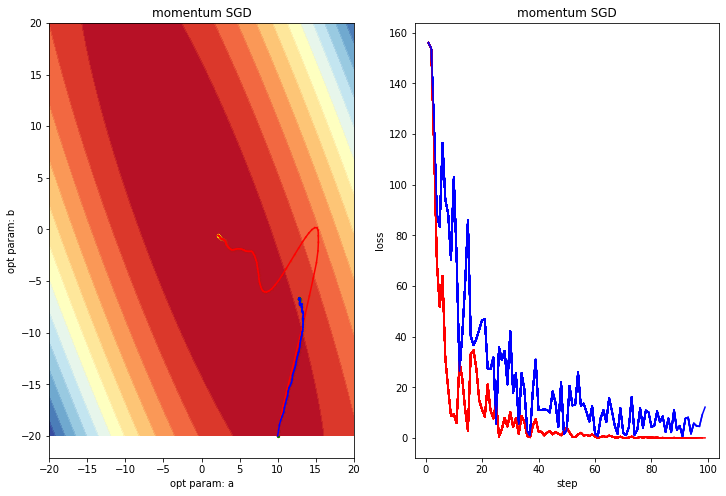

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import random

rate = 0.01 # learning rate
def da(y, y_p,x):
    return (y-y_p)*(-x)

def db(y, y_p):
    return (y-y_p)*(-1)

def calc_loss(a,b,x,y):
    tmp = y - (a * x + b)
    tmp = tmp ** 2  # Square every element in the matrix
    SSE = sum(tmp) / 2*len(x)# Take the average
    return SSE

#draw all curve point
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    print(a)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)

    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            SSE = calc_loss(a=a0, b=b0, x=x, y=y)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

def shuffle_data(x,y):
    # random disturb x，y，while keep x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def get_batch_data(x, y, batch=3):
    shuffle_data(x, y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new, y_new]

# create simulated data
# x = [30, 35, 37, 59, 70, 76, 88, 100]
# y = [1100,	1423,	1377,	1800,	2304,	2588,	3495,	4839]
a = np.loadtxt('LRdata.txt')
x = a[:,1]
y = a[:,2]
# Data normalization
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)


[ha, hb, hallSSE] = draw_hill(x, y)

# init a,b value
a = 10.0
b = -20.0
fig = plt.figure(1, figsize=(12, 8))

plt.ion() # iteration on

a_sgd = a
b_sgd = b

all_loss = []
all_step = []
all_loss_sgd = []
all_step_sgd = []

last_a = a
last_b = b
last_a_sgd = a_sgd
last_b_sgd = b_sgd

# momentum
va = 0
vb = 0
gamma = 0.9

for step in range(1, 100):
    loss = 0
    loss_sgd = 0

    all_da = 0
    all_db = 0
    all_da_sgd = 0
    all_db_sgd = 0

    shuffle_data(x,y)
    [x_new, y_new] = get_batch_data(x, y, batch=3)

    for i in range(0,len(x_new)):
        y_p = a*x_new[i] + b
        y_p_sgd = a_sgd * x_new[i] + b_sgd

        loss += (y_new[i] - y_p)*(y_new[i] - y_p)/2
        loss_sgd += (y_new[i] - y_p_sgd)*(y_new[i] - y_p_sgd)/2

        all_da += da(y_new[i], y_p, x[i])
        all_db += db(y_new[i], y_p)
        all_da_sgd += da(y_new[i], y_p_sgd, x[i])
        all_db_sgd += db(y_new[i], y_p_sgd)
    loss = loss /len(x_new)
    loss_sgd = loss_sgd /len(x_new)

    # draw fig.1 contour line
    plt.subplot(1, 2, 1)
    
    plt.contourf(ha, hb, hallSSE, 15, alpha=0.1, cmap = plt.cm.RdYlBu)
    plt.scatter(a, b, s=5, color='yellow')
    plt.plot([last_a, a], [last_b, b], color='red', label="momentum sgd")
    plt.scatter(a_sgd, b_sgd, s=5, color='green')
    plt.plot([last_a_sgd, a_sgd], [last_b_sgd, b_sgd], color='blue', label="sgd")
    plt.title('momentum SGD')
    plt.xlabel('opt param: a')
    plt.ylabel('opt param: b')

    # draw fig.2 loss line
    all_loss.append(loss)
    all_loss_sgd.append(loss_sgd)

    all_step.append(step)
    all_step_sgd.append(step)

    plt.subplot(1, 2, 2)
    plt.plot(all_step, all_loss, color='red', label='momentum sgd')
    plt.plot(all_step_sgd, all_loss_sgd, color='blue', label='sgd')

    plt.title('momentum SGD')
    plt.xlabel("step")
    plt.ylabel("loss")

    last_a = a
    last_b = b
    last_a_sgd = a_sgd
    last_b_sgd = b_sgd

    # update param
    va = gamma * va + rate * all_da
    vb = gamma * vb + rate * all_db
    a = a - va
    b = b - vb

    a_sgd = a_sgd - rate * all_da_sgd
    b_sgd = b_sgd - rate * all_db_sgd

plt.show()

**Implementing Adagrad function with the toy dataset**

[-20.         -19.5959596  -19.19191919 -18.78787879 -18.38383838
 -17.97979798 -17.57575758 -17.17171717 -16.76767677 -16.36363636
 -15.95959596 -15.55555556 -15.15151515 -14.74747475 -14.34343434
 -13.93939394 -13.53535354 -13.13131313 -12.72727273 -12.32323232
 -11.91919192 -11.51515152 -11.11111111 -10.70707071 -10.3030303
  -9.8989899   -9.49494949  -9.09090909  -8.68686869  -8.28282828
  -7.87878788  -7.47474747  -7.07070707  -6.66666667  -6.26262626
  -5.85858586  -5.45454545  -5.05050505  -4.64646465  -4.24242424
  -3.83838384  -3.43434343  -3.03030303  -2.62626263  -2.22222222
  -1.81818182  -1.41414141  -1.01010101  -0.60606061  -0.2020202
   0.2020202    0.60606061   1.01010101   1.41414141   1.81818182
   2.22222222   2.62626263   3.03030303   3.43434343   3.83838384
   4.24242424   4.64646465   5.05050505   5.45454545   5.85858586
   6.26262626   6.66666667   7.07070707   7.47474747   7.87878788
   8.28282828   8.68686869   9.09090909   9.49494949   9.8989899
  10.3030303 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


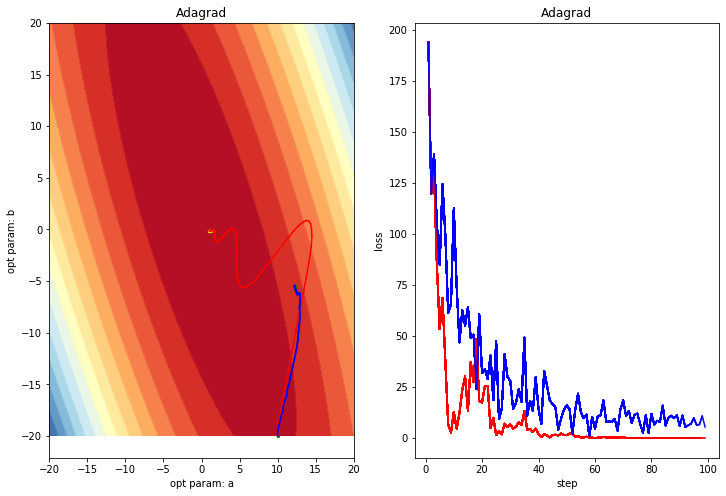

In [0]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import tensorflow as tf

rate = 0.01 # learning rate
def da(y, y_p,x):
    return (y-y_p)*(-x)

def db(y, y_p):
    return (y-y_p)*(-1)

def calc_loss(a,b,x,y):
    tmp = y - (a * x + b)
    tmp = tmp ** 2  # Square every element in the matrix
    SSE = sum(tmp) / 2*len(x)# Take the average
    return SSE

#draw all curve point
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    print(a)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)

    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            SSE = calc_loss(a=a0, b=b0, x=x, y=y)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

def shuffle_data(x,y):
    # random disturb x，y，while keep x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def get_batch_data(x, y, batch=3):
    shuffle_data(x, y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new, y_new]

# create simulated data
x = [30, 35, 37, 59, 70, 76, 88, 100, 120, 145]
y = [1100,	1423,	1377,	1800,	2304,	2588,	3495,	4839, 6000, 8099]
#a = np.loadtxt('LRdata.txt')
#x = a[:,1]
#y = a[:,2]
# Data normalization
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)


[ha, hb, hallSSE] = draw_hill(x, y)

# init a,b value
a = 10.0
b = -20.0
fig = plt.figure(1, figsize=(12, 8))

plt.ion() # iteration on


a_sgd = a
b_sgd = b

all_loss = []
all_step = []
all_loss_sgd = []
all_step_sgd = []

last_a = a
last_b = b
last_a_sgd = a_sgd
last_b_sgd = b_sgd

# momentum
va = 0
vb = 0
gamma = 0.9

for step in range(1, 100):
    loss = 0
    loss_sgd = 0

    all_da = 0
    all_db = 0
    all_da_sgd = 0
    all_db_sgd = 0

    shuffle_data(x,y)
    [x_new, y_new] = get_batch_data(x, y, batch=3)

    for i in range(0,len(x_new)):
        y_p = a*x_new[i] + b
        y_p_sgd = a_sgd * x_new[i] + b_sgd

        loss += (y_new[i] - y_p)*(y_new[i] - y_p)/2
        loss_sgd += (y_new[i] - y_p_sgd)*(y_new[i] - y_p_sgd)/2

        all_da += da(y_new[i], y_p, x[i])
        all_db += db(y_new[i], y_p)
        all_da_sgd += da(y_new[i], y_p_sgd, x[i])
        all_db_sgd += db(y_new[i], y_p_sgd)
    loss = loss /len(x_new)
    loss_sgd = loss_sgd /len(x_new)

    # draw fig.1 contour line
    plt.subplot(1, 2, 1)
    plt.contourf(ha, hb, hallSSE, 15, alpha=0.1, cmap = plt.cm.RdYlBu)
    plt.scatter(a, b, s=5, color='yellow')
    plt.plot([last_a, a], [last_b, b], color='red', label="Adagrad")
    plt.scatter(a_sgd, b_sgd, s=5, color='green')
    plt.plot([last_a_sgd, a_sgd], [last_b_sgd, b_sgd], color='blue', label="sgd")
    plt.title('Adagrad')
    plt.xlabel('opt param: a')
    plt.ylabel('opt param: b')

    # draw fig.2 loss line
    all_loss.append(loss)
    all_loss_sgd.append(loss_sgd)

    all_step.append(step)
    all_step_sgd.append(step)

    plt.subplot(1, 2, 2)
    plt.plot(all_step, all_loss, color='red', label='momentum sgd')
    plt.plot(all_step_sgd, all_loss_sgd, color='blue', label='sgd')

    plt.title('Adagrad')
    plt.xlabel("step")
    plt.ylabel("loss")

    last_a = a
    last_b = b
    last_a_sgd = a_sgd
    last_b_sgd = b_sgd

    # update param
    va = gamma * va + rate * all_da
    vb = gamma * vb + rate * all_db
    a = a - va
    b = b - vb

    a_sgd = a_sgd - rate * all_da_sgd
    b_sgd = b_sgd - rate * all_db_sgd

plt.show()

**Implementing Adam Optimizer function with toy dataset** 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:122: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


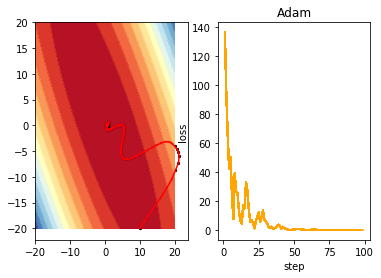

In [0]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import tensorflow as tf


rate = 2 # learning rate
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

def da(y, y_p,x):
    return (y-y_p)*(-x)

def db(y, y_p):
    return (y-y_p)*(-1)

def calc_loss(a,b,x,y):
    tmp = y - (a * x + b)
    tmp = tmp ** 2  # Square every element in the matrix
    SSE = sum(tmp) / 2*len(x)# Take the average
    return SSE

#draw all curve point
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    # print(a)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)

    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            SSE = calc_loss(a=a0, b=b0, x=x, y=y)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

def shuffle_data(x,y):
    # random disturb x，y，while keep x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def get_batch_data(x, y, batch=3):
    shuffle_data(x, y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new, y_new]

# create simulated data
# x = [30, 35, 37, 59, 70, 76, 88, 100]
# y = [1100,	1423,	1377,	1800,	2304,	2588,	3495,	4839]
a = np.loadtxt('LRdata.txt')
x = a[:, 1]
y = a[:, 2]
# Data normalization
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)


[ha, hb, hallSSE] = draw_hill(x, y)

# init a,b value
a = 10.0
b = -20.0
plt.ion() # iteration on


all_loss = []
all_step = []

last_a = a
last_b = b

m = 0.0
v = 0.0

theta = np.array([0, 0]).astype(np.float32)

for step in range(1, 100):
    loss = 0
    all_da = 0
    all_db = 0

    shuffle_data(x, y)
    [x_new, y_new] = get_batch_data(x, y, batch=4)
    for i in range(0, len(x_new)):
        y_p = a * x_new[i] + b
        loss += (y_new[i] - y_p) * (y_new[i] - y_p)/2
        all_da += da(y_new[i], y_p, x_new[i])
        all_db += db(y_new[i], y_p)

    loss = loss / len(x_new)
    all_d = np.array([all_da, all_db]).astype(np.float32)

    # draw fig.1 contour line
    plt.subplot(1, 2, 1)
    plt.contourf(ha, hb, hallSSE, 15, alpha=0.1, cmap = plt.cm.RdYlBu)
    plt.scatter(a, b, s=5, color='black')
    plt.plot([last_a, a], [last_b, b], color='red', label="Adam")

    # draw fig.2 loss line
    all_loss.append(loss)
    all_step.append(step)

    plt.subplot(1, 2, 2)
    plt.plot(all_step, all_loss, color='orange', label='Adam')

    plt.title('Adam')
    plt.xlabel("step")
    plt.ylabel("loss")

    last_a = a
    last_b = b

    # update param

    m = beta1 * m + (1 - beta1) * all_d
    v = beta2 * v + (1 - beta2) * (all_d ** 2)

    m_ = m / (1 - np.power(beta1, step))
    v_ = v / (1 - np.power(beta2, step))

    theta = -(rate / (np.sqrt(v_) + epsilon)) * m_

    [a, b] = [a, b] + theta

plt.show()

**Implementing RMSprop function using toy Dataset**

In [0]:
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import tensorflow as tf


rate = 0.01 # learning rate
def da(y, y_p,x):
    return (y-y_p)*(-x)

def db(y, y_p):
    return (y-y_p)*(-1)

def calc_loss(a,b,x,y):
    tmp = y - (a * x + b)
    tmp = tmp ** 2  # Square every element in the matrix
    SSE = sum(tmp) / (2*len(x)) # Take the average
    return SSE

#draw all curve point
def draw_hill(x,y):
    a = np.linspace(-20,20,100)
    # print(a)
    b = np.linspace(-20,20,100)
    x = np.array(x)
    y = np.array(y)

    allSSE = np.zeros(shape=(len(a),len(b)))
    for ai in range(0,len(a)):
        for bi in range(0,len(b)):
            a0 = a[ai]
            b0 = b[bi]
            SSE = calc_loss(a=a0, b=b0, x=x, y=y)
            allSSE[ai][bi] = SSE

    a,b = np.meshgrid(a, b)

    return [a,b,allSSE]

def shuffle_data(x,y):
    # random disturb x，y，while keep x_i corresponding to y_i
    seed = random.random()
    random.seed(seed)
    random.shuffle(x)
    random.seed(seed)
    random.shuffle(y)

def get_batch_data(x, y, batch=3):
    shuffle_data(x, y)
    x_new = x[0:batch]
    y_new = y[0:batch]
    return [x_new, y_new]

# create simulated data
# x = [30, 35, 37, 59, 70, 76, 88, 100]
# y = [1100,	1423,	1377,	1800,	2304,	2588,	3495,	4839]
a = np.loadtxt('LRdata.txt')
x = a[:, 1]
y = a[:, 2]
# Data normalization
x_max = max(x)
x_min = min(x)
y_max = max(y)
y_min = min(y)

for i in range(0, len(x)):
    x[i] = (x[i] - x_min)/(x_max - x_min)
    y[i] = (y[i] - y_min)/(y_max - y_min)


[ha, hb, hallSSE] = draw_hill(x, y)

# init a,b value
a = 10.0
b = -20.0
fig = plt.figure(1, figsize=(12, 8))
# fig.suptitle('Adagrad, learning rate: %.2f'%(rate), fontsize=15)

plt.ion() # iteration on

all_loss = []
all_step = []

last_a = a
last_b = b

theta = np.array([0, 0]).astype(np.float32)
E_grad = np.array([0, 0]).astype(np.float32)
# E_theta = np.array([0, 0]).astype(np.float32)

epsilon = 1e-2
gamma = 0.9

for step in range(1, 100):
    loss = 0
    all_da = 0
    all_db = 0

    shuffle_data(x, y)
    [x_new, y_new] = get_batch_data(x, y, batch=4)
    all_d = np.array([0, 0]).astype(np.float32)
    for i in range(0, len(x_new)):
        y_p = a * x_new[i] + b
        loss += (y_new[i] - y_p) * (y_new[i] - y_p)/2
        all_da += da(y_new[i], y_p, x_new[i])
        all_db += db(y_new[i], y_p)

    loss = loss / len(x_new)
    all_d = np.array([all_da, all_db])

    # draw fig.1 contour line
    plt.subplot(1, 2, 1)
    plt.contourf(ha, hb, hallSSE, 15, alpha=0.1, cmap = plt.cm.RdYlBu)
    plt.scatter(a, b, s=5, color='black')
    plt.plot([last_a, a], [last_b, b], color='red', label="RMSprop")

    # draw fig.2 loss line
    all_loss.append(loss)
    all_step.append(step)

    plt.subplot(1, 2, 2)
    plt.plot(all_step, all_loss, color='orange', label='RMSprop')

    plt.title('RMSprop')
    plt.xlabel("step")
    plt.ylabel("loss")

    last_a = a
    last_b = b

    # update param

    E_grad = gamma * E_grad + (1-gamma) * (all_d ** 2)
    rms_grad = np.sqrt(E_grad + epsilon)

    # E_theta = gamma * E_theta + (1-gamma) * (theta ** 2)
    # rms_theta = np.sqrt(E_theta + epsilon)

    theta = -( rate / rms_grad) * all_d
    [a, b] = [a, b] + theta

plt.show()